## Of those customers who are spending less over time, with which categories are they becoming less engaged?

DRAFT Plan    
- Look at available Data Tables in Database Schema    
- Identify relevant Data Tables to load    
- Explore individual loaded datasets    
- Join datasets    
-    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Let's have a look at the available Household Demographic data (801 out of 2,500 total customer population)

In [4]:
hh_demog = pd.read_csv("/Users/CRT/Desktop/WiderCommunities/dunnhumby/hh_demographic.csv")

In [5]:
len(hh_demog)

801

In [6]:
hh_demog.head(n=5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [10]:
len(hh_demog["household_key"].unique()) #There are 801 household-sized customers

801

In [38]:
hh_demog["HOUSEHOLD_SIZE_DESC"].dtype

dtype('O')

In [17]:
?pd.to_numeric

In [19]:
a = pd.to_numeric(hh_demog["HOUSEHOLD_SIZE_DESC"], errors = 'coerce')

In [21]:
type(a)

pandas.core.series.Series

In [32]:
a.describe()

count    735.000000
mean       1.945578
std        0.884181
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: HOUSEHOLD_SIZE_DESC, dtype: float64

In [33]:
a.sum() #Total no. of customers (whether direct or indirect as it were) within sample of 801 households

1430.0

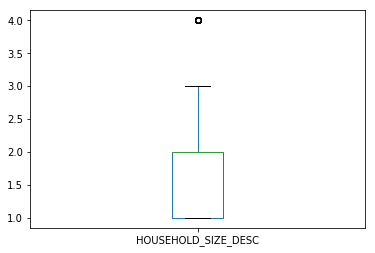

In [22]:
a.plot(kind = 'box') #Households are mainly made up of 1-2 people

In [27]:
1430/801  #Household size sensecheck

1.7852684144818975

### Look at Transaction Data

In [28]:
transactions = pd.read_csv("/Users/CRT/Desktop/WiderCommunities/dunnhumby/transaction_data.csv")

In [29]:
transactions.head(n = 5)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [31]:
len(transactions) #Count of total individual transactions in dataset

2595732

In [37]:
transactions["DAY"].dtype  #Check the data type of the DAY column

dtype('int64')

In [39]:
transactions["DAY"].max()  

711

In [41]:
711/30.4  #Check time period of dataset is 2 years as guide describes

23.388157894736842

In [42]:
b = transactions.iloc[ : , [2, 4, 5]]

In [43]:
len(b)

2595732

In [55]:
b.head(n = 3)

,DAY,QUANTITY,SALES_VALUE
0,1,1,1.39
1,1,1,0.82
2,1,1,0.99


In [46]:
#Just playing with loops here
for i in ([b["DAY"], b["QUANTITY"], b["SALES_VALUE"]]):
    print(i.dtype)

int64
int64
float64


In [49]:
trend = b.groupby("DAY").sum()

In [56]:
trend.head(n = 3)

,QUANTITY,SALES_VALUE
DAY,,
1,302,549.31
2,156,458.91
3,678,1560.37


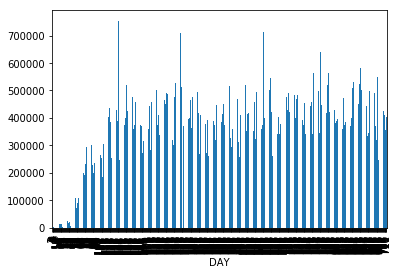

In [53]:
trend["QUANTITY"].plot(kind = 'bar')

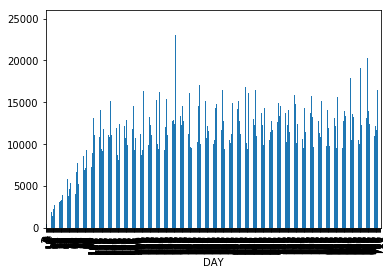

In [54]:
trend["SALES_VALUE"].plot(kind = 'bar')

### How to identify the customers/households who are spending less over time?

In [59]:
c = transactions.iloc[ : , [0, 2, 5]]

In [60]:
c.head(n = 3)

,household_key,DAY,SALES_VALUE
0,2375,1,1.39
1,2375,1,0.82
2,2375,1,0.99


In [65]:
#This is in long format - let's transform/pivot into wide format so we have the date as the index so we have time-series

In [82]:
c.groupby(by = ['DAY','household_key'])['SALES_VALUE'].sum()

DAY  household_key
1    98                 5.79
     212               69.26
     718              168.48
     744                0.00
     1060             139.22
     1130               2.55
     1172              44.78
     1173               3.53
     1287               0.00
     1351               0.99
     1364              11.37
     1916              65.73
     2052              14.27
     2375              18.34
     2483               5.00
2    240                3.98
     255               18.88
     271               82.20
     304               35.15
     480              100.98
     718               45.40
     985                5.00
     1617               2.37
     1843              14.98
     1916               9.55
     2105              46.63
     2305              93.79
3    122                4.25
     216                8.80
     293              251.55
                       ...  
711  2244               8.76
     2245             157.01
     2247              3